In [2]:
import pandas as pd
import pycountry

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# this contains information about the countries of the world
world_data_df = pd.read_csv('world-data-2023.csv') # from kaggle; global country information https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023

# this contains information about the immigration/emigration rates of the countries of the world including demogrphics of the country's emigrants and immigrants and the regional classification of the country
emigration_immigration_rates_df = pd.read_excel('Migration-Rates-2000-2010-2020/emigration-immigration-rates.xlsx') # from https://thedocs.worldbank.org/en/doc/c36d19e775a2b700ae94e879ef83b253-0050062023/original/Migration-Rates-2000-2010-2020.zip

# this contains information on the destination and origin of migrants, categorized by gender and quantified by the number of those migrants sharing the same origin and destination
migration_matrix_df = pd.read_excel('Global-Migration-Matrix-1960-2020/WBMM_1960_2020.xlsx') # from https://thedocs.worldbank.org/en/doc/00700f3fc0f4eb17bdc08a372a4a2a13-0050062023/original/Global-Migration-Matrix-1960-2020.zip

Correcting and supplementing 3 letter codes

In [3]:
# immigration_df = pd.DataFrame(columns=['Xcountry', 'Xabb', 'Xregion10', 'Xyear', 'Xtotal_pop', 'total_immi', 'Xtotal_immi_male', 'Xtotal_immi_female','Xbirth_rate', 
#                                        'Xinfant_mortality', 'Xnum_physicians', 'Xlife_exp', 'Xoop_healthcare', 'Xgdp', 'Xunemployement',
#                                        'Xminimum_wage', 'Xpschool_enrollment', 'Xtschool_enrollment', 'Xhs_immi_male', 'Xhs_immi_female', 'Xhs_immi_total', 'Xhs_male', 'Xhs_female',
#                                        'Xhs_total', 'Xlabor', 'Xhs_labor', 'Xnhs_labor', 'Xpopm014', 'Xpopf014', 'Ximmi_m014', 'Ximmi_f014'])

immi_emi_df = pd.DataFrame()

# print(len(world_data_df))
# print(len(emigration_immigration_rates_df[emigration_immigration_rates_df['year'] == 2020]))

country_to_abbr = {country.name: country.alpha_3 for country in pycountry.countries}
manual_corrections = {
    "The Bahamas": "BHS",
    "Bolivia": "BOL",
    "Brunei": "BRN",
    "Ivory Coast": "CIV",
    "Cape Verde": "CPV",
    "Republic of the Congo": "COG",
    "Czech Republic": "CZE",
    "Democratic Republic of the Congo": "COD",
    "The Gambia": "GMB",
    "Vatican City": "VAT",
    "Iran": "IRN",
    "Republic of Ireland": "IRL",
    "Laos": "LAO",
    "Federated States of Micronesia": "FSM",
    "Moldova": "MDA",
    "North Korea": "PRK",
    "South Korea": "KOR",
    "Syria": "SYR",
    "Tanzania": "TZA",
    "East Timor": "TLS",
    "Turkey": "TUR",
    "Venezuela": "VEN",
    "Vietnam": "VNM",
    "Russia": "RUS",
    "Palestine": "PSE"
}

country_to_abbr.update(manual_corrections)
world_data_df.loc[150, 'Country'] = "Sao Tome and Principe"
world_data_df.loc[133, 'Country'] = "Palestine"
world_data_df["Abbreviation"] = world_data_df["Country"].map(country_to_abbr)
world_data_df[world_data_df["Abbreviation"].isnull()]["Country"]

Series([], Name: Country, dtype: object)

In [4]:
immi_emi_df['abb'] = world_data_df['Abbreviation']
immi_emi_df['birth_rate'] = world_data_df['Birth Rate']
immi_emi_df['country'] = world_data_df['Country']
immi_emi_df['fertility_rate'] = world_data_df['Fertility Rate']
immi_emi_df['gdp'] = world_data_df['GDP']
immi_emi_df['pschool_enrollment'] = world_data_df['Gross primary education enrollment (%)']
immi_emi_df['tschool_enrollment'] = world_data_df['Gross tertiary education enrollment (%)']
immi_emi_df['infant_mortality'] = world_data_df['Infant mortality']
immi_emi_df['life_expectancy'] = world_data_df['Life expectancy']
immi_emi_df['maternal_mortality_ratio'] = world_data_df['Maternal mortality ratio']
immi_emi_df['minimum_wage'] = world_data_df['Minimum wage']
immi_emi_df['oop_healthcare'] = world_data_df['Out of pocket health expenditure']
immi_emi_df['physicians_per1000'] = world_data_df['Physicians per thousand']
immi_emi_df['population'] = world_data_df['Population']
immi_emi_df['unemployment'] = world_data_df['Unemployment rate']
immi_emi_df

,abb,birth_rate,country,fertility_rate,gdp,pschool_enrollment,tschool_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,oop_healthcare,physicians_per1000,population,unemployment
0,AFG,32.49,Afghanistan,4.47,"$19,101,353,833",104.00%,9.70%,47.9,64.5,638.0,$0.43,78.40%,0.28,"38,041,754",11.12%
1,ALB,11.78,Albania,1.62,"$15,278,077,447",107.00%,55.00%,7.8,78.5,15.0,$1.12,56.90%,1.20,"2,854,191",12.33%
2,DZA,24.28,Algeria,3.02,"$169,988,236,398",109.90%,51.40%,20.1,76.7,112.0,$0.95,28.10%,1.72,"43,053,054",11.70%
3,AND,7.20,Andorra,1.27,"$3,154,057,987",106.40%,NaN,2.7,NaN,NaN,$6.63,36.40%,3.33,"77,142",NaN
4,AGO,40.73,Angola,5.52,"$94,635,415,870",113.50%,9.30%,51.6,60.8,241.0,$0.71,33.40%,0.21,"31,825,295",6.89%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,VEN,17.88,Venezuela,2.27,"$482,359,318,768",97.20%,79.30%,21.4,72.1,125.0,$0.01,45.80%,1.92,"28,515,829",8.80%
191,VNM,16.75,Vietnam,2.05,"$261,921,244,843",110.60%,28.50%,16.5,75.3,43.0,$0.73,43.50%,0.82,"96,462,106",2.01%
192,YEM,30.45,Yemen,3.79,"$26,914,402,224",93.60%,10.20%,42.9,66.1,164.0,NaN,81.00%,0.31,"29,161,922",12.91%
193,ZMB,36.19,Zambia,4.63,"$23,064,722,446",98.70%,4.10%,40.4,63.5,213.0,$0.24,27.50%,1.19,"17,861,030",11.43%


In [5]:
immigration_stats_df = emigration_immigration_rates_df[['country', 'year', 'region10_ori', 'iso3', 'Immigrants_males', 'Immigrants_females',
                                                        'Immigrants_males_HS', 'Immigrants_females_HS', 'Immigrants_HS_total', 'Labor_males_HS', 
                                                        'Labor_females_HS', 'Labor_HS', 'Labor', 'Labor_LS', 'Labor_females_LS', 'Labor_males_LS', 
                                                        'popf014', 'popm014', 'Immigrants_014_female', 'Immigrants_014_male', 'Immigrants_total']]
immigration_stats_df_2020 = immigration_stats_df[immigration_stats_df['year'] == 2020]
# merge 2020 immigration stats with world data
immigration_df = pd.merge(immi_emi_df, immigration_stats_df_2020, left_on='abb', right_on='iso3', how='left')
immigration_df

,abb,birth_rate,country_x,fertility_rate,gdp,pschool_enrollment,tschool_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,...,Labor_HS,Labor,Labor_LS,Labor_females_LS,Labor_males_LS,popf014,popm014,Immigrants_014_female,Immigrants_014_male,Immigrants_total
0,AFG,32.49,Afghanistan,4.47,"$19,101,353,833",104.00%,9.70%,47.9,64.5,638.0,...,1124901.0,22647496.0,21522594.0,10809482.0,10729555.0,7947146.0,8333700.0,11065.0,8352.0,124681.0
1,ALB,11.78,Albania,1.62,"$15,278,077,447",107.00%,55.00%,7.8,78.5,15.0,...,218361.0,2348722.0,2130361.0,1069069.0,1061504.0,231501.0,257626.0,3946.0,4231.0,40633.0
2,DZA,24.28,Algeria,3.02,"$169,988,236,398",109.90%,51.40%,20.1,76.7,112.0,...,2734122.0,30352152.0,27618030.0,13593534.0,14018136.0,6608900.0,6889992.0,15376.0,16873.0,218129.0
3,AND,7.20,Andorra,1.27,"$3,154,057,987",106.40%,NaN,2.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2256.0,2237.0,41084.0
4,AGO,40.73,Angola,5.52,"$94,635,415,870",113.50%,9.30%,51.6,60.8,241.0,...,82270.0,17617840.0,17535570.0,8980643.0,8554850.0,7590076.0,7658353.0,12009.0,16401.0,628024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,VEN,17.88,Venezuela,2.27,"$482,359,318,768",97.20%,79.30%,21.4,72.1,125.0,...,3705871.0,20683548.0,16977676.0,8339556.0,8594542.0,3794930.0,3957465.0,117716.0,110717.0,1095761.0
191,VNM,16.75,Vietnam,2.05,"$261,921,244,843",110.60%,28.50%,16.5,75.3,43.0,...,3059255.0,74761840.0,71702584.0,36715452.0,34992352.0,10673109.0,11903637.0,5793.0,7913.0,63061.0
192,YEM,30.45,Yemen,3.79,"$26,914,402,224",93.60%,10.20%,42.9,66.1,164.0,...,653861.0,18243880.0,17590020.0,8950011.0,8650424.0,5675675.0,5906414.0,29328.0,40759.0,317028.0
193,ZMB,36.19,Zambia,4.63,"$23,064,722,446",98.70%,4.10%,40.4,63.5,213.0,...,115165.0,10291816.0,10176651.0,5230427.0,4946757.0,4008980.0,4083160.0,9809.0,10605.0,167542.0


In [6]:
emigration_stats_df = emigration_immigration_rates_df[['country', 'year', 'region10_ori', 'iso3', 'Emigrants_males', 'Emigrants_females',
                                                       'Emigrants_males_HS', 'Emigrants_females_HS', 'Emigrants_HS_total', 'Labor_males_HS',
                                                       'Labor_females_HS', 'Labor_HS', 'Labor', 'Labor_LS', 'Labor_females_LS', 'Labor_males_LS',
                                                       'popf014', 'popm014', 'Emigrants_014_female', 'Emigrants_014_male', 'Emigrants_total']]
emigration_stats_df_2020 = emigration_stats_df[emigration_stats_df['year'] == 2020]
emigration_df = pd.merge(immi_emi_df, emigration_stats_df_2020, left_on='abb', right_on='iso3', how='left')
emigration_df

,abb,birth_rate,country_x,fertility_rate,gdp,pschool_enrollment,tschool_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,...,Labor_HS,Labor,Labor_LS,Labor_females_LS,Labor_males_LS,popf014,popm014,Emigrants_014_female,Emigrants_014_male,Emigrants_total
0,AFG,32.49,Afghanistan,4.47,"$19,101,353,833",104.00%,9.70%,47.9,64.5,638.0,...,1124901.0,22647496.0,21522594.0,10809482.0,10729555.0,7947146.0,8333700.0,465982.0,563018.0,4683917.0
1,ALB,11.78,Albania,1.62,"$15,278,077,447",107.00%,55.00%,7.8,78.5,15.0,...,218361.0,2348722.0,2130361.0,1069069.0,1061504.0,231501.0,257626.0,35287.0,45140.0,998089.0
2,DZA,24.28,Algeria,3.02,"$169,988,236,398",109.90%,51.40%,20.1,76.7,112.0,...,2734122.0,30352152.0,27618030.0,13593534.0,14018136.0,6608900.0,6889992.0,16369.0,56175.0,1706780.0
3,AND,7.20,Andorra,1.27,"$3,154,057,987",106.40%,NaN,2.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,489.0,430.0,8726.0
4,AGO,40.73,Angola,5.52,"$94,635,415,870",113.50%,9.30%,51.6,60.8,241.0,...,82270.0,17617840.0,17535570.0,8980643.0,8554850.0,7590076.0,7658353.0,41403.0,44123.0,533102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,VEN,17.88,Venezuela,2.27,"$482,359,318,768",97.20%,79.30%,21.4,72.1,125.0,...,3705871.0,20683548.0,16977676.0,8339556.0,8594542.0,3794930.0,3957465.0,375424.0,381347.0,4514649.0
191,VNM,16.75,Vietnam,2.05,"$261,921,244,843",110.60%,28.50%,16.5,75.3,43.0,...,3059255.0,74761840.0,71702584.0,36715452.0,34992352.0,10673109.0,11903637.0,125891.0,146278.0,3034054.0
192,YEM,30.45,Yemen,3.79,"$26,914,402,224",93.60%,10.20%,42.9,66.1,164.0,...,653861.0,18243880.0,17590020.0,8950011.0,8650424.0,5675675.0,5906414.0,29829.0,51052.0,1237110.0
193,ZMB,36.19,Zambia,4.63,"$23,064,722,446",98.70%,4.10%,40.4,63.5,213.0,...,115165.0,10291816.0,10176651.0,5230427.0,4946757.0,4008980.0,4083160.0,5081.0,6964.0,167069.0


In [7]:
bad_cols = ['gdp', 'pschool_enrollment', 'tschool_enrollment', 'oop_healthcare', 'minimum_wage', 'population', 'unemployment']

for col in bad_cols:
    # Remove special characters and convert to float
    immigration_df[col] = immigration_df[col].str.replace('[\$,]', '', regex=True).str.replace('%', '', regex=True).astype(float)
    emigration_df[col] = emigration_df[col].str.replace('[\$,]', '', regex=True).str.replace('%', '', regex=True).astype(float) / 100

immigration_df['pschool_enrollment'] = immigration_df['pschool_enrollment'] / 100
immigration_df['tschool_enrollment'] = immigration_df['tschool_enrollment'] / 100
emigration_df['pschool_enrollment'] = emigration_df['pschool_enrollment'] / 100
emigration_df['tschool_enrollment'] = emigration_df['tschool_enrollment'] / 100

# print(immigration_df.iloc[0])
# print(emigration_df.iloc[0])

In [ ]:
# immigration_df.to_csv('immigration_df.csv', index=False)
# emigration_df.to_csv('emigration_df.csv', index=False)

In [4]:
immigration_df = pd.read_csv('immigration_df.csv')
emigration_df = pd.read_csv('emigration_df.csv')

/var/folders/gs/vtwmxhmx2bx_dpqbff_gyxy00000gn/T/ipykernel_57172/3783902263.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data_immigration.dropna(inplace=True)


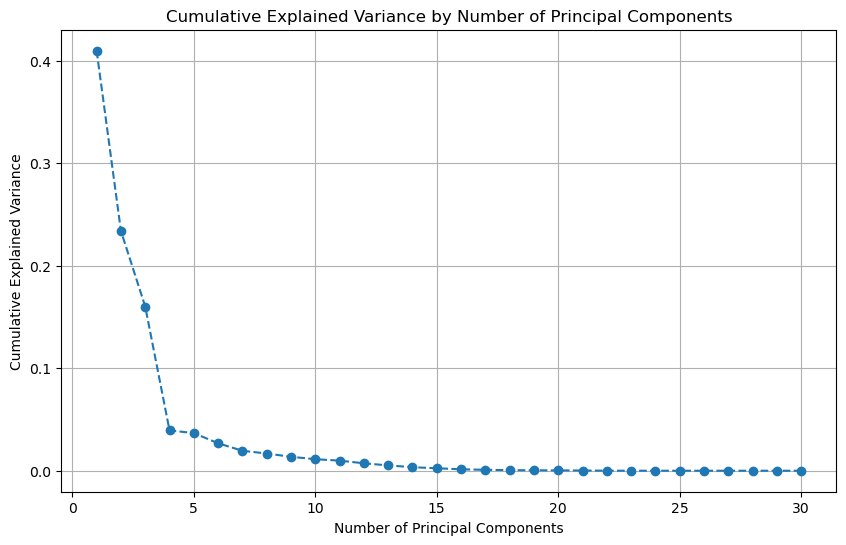

Principal Component Loadings
        birth_rate  fertility_rate           gdp  pschool_enrollment  \
PC1  -1.104460e-01   -1.022182e-01  2.470120e-01       -3.840973e-04   
PC2   2.033428e-01    1.940813e-01  2.954929e-02        2.212613e-02   
PC3   3.090814e-01    3.081813e-01  4.928956e-02       -2.369041e-02   
PC4   4.460544e-02    1.939602e-02  5.343243e-02        7.033668e-01   
PC5  -5.173158e-02   -1.277463e-01 -2.917821e-02        4.360488e-01   
PC6  -1.065164e-01   -1.851941e-01 -1.098690e-01        3.775728e-01   
PC7   3.389166e-02   -1.879006e-02  5.327575e-02       -3.105489e-01   
PC8  -6.599324e-02   -7.034245e-02  3.788249e-01       -1.683508e-01   
PC9   5.748183e-03   -5.007262e-02 -1.350788e-01        3.281839e-02   
PC10  1.061186e-01    1.101709e-01  5.587474e-01        1.871278e-01   
PC11 -4.701125e-01   -5.088710e-01  1.896399e-01       -8.453484e-02   
PC12 -1.741120e-01   -2.152663e-01 -1.340732e-01       -1.997603e-03   
PC13  1.025264e-01    1.593067e-01 

In [5]:
numerical_columns_immigration = ['birth_rate', 'fertility_rate', 'gdp', 'pschool_enrollment', 'tschool_enrollment', 'infant_mortality', 
                                    'life_expectancy', 'maternal_mortality_ratio', 'minimum_wage', 'oop_healthcare', 'physicians_per1000', 
                                    'population', 'unemployment', 'Immigrants_males', 'Immigrants_females', 'Immigrants_males_HS', 'Immigrants_females_HS',
                                    'Immigrants_HS_total', 'Labor_males_HS', 'Labor_females_HS', 'Labor_HS', 'Labor', 'Labor_LS', 'Labor_females_LS',
                                    'Labor_males_LS', 'popf014', 'popm014', 'Immigrants_014_female', 'Immigrants_014_male', 'Immigrants_total']

# filter numerical columns
numerical_data_immigration = immigration_df[numerical_columns_immigration]

numerical_data_immigration.dropna(inplace=True)

# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data_immigration)

# apply pca
pca = PCA()
pca_transformed = pca.fit_transform(scaled_data)

# explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# print principal component loadings
loadings = pd.DataFrame(
    pca.components_,
    columns=numerical_columns_immigration,
    index=[f'PC{i+1}' for i in range(len(numerical_columns_immigration))]
)

print("Principal Component Loadings")
print(loadings)

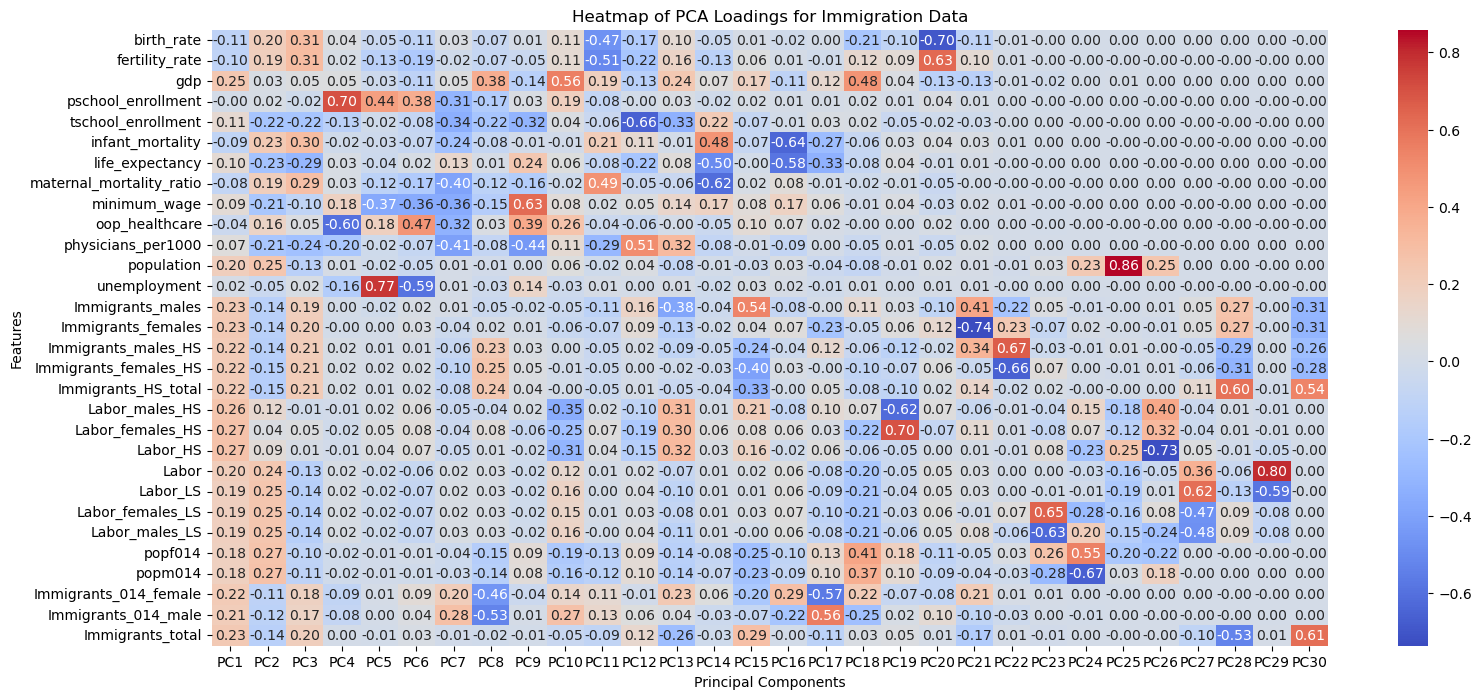

In [6]:
plt.figure(figsize=(18, 8))
sns.heatmap(loadings.T, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap of PCA Loadings for Immigration Data')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()


/var/folders/gs/vtwmxhmx2bx_dpqbff_gyxy00000gn/T/ipykernel_57172/1973008327.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data_emigration.dropna(inplace=True)


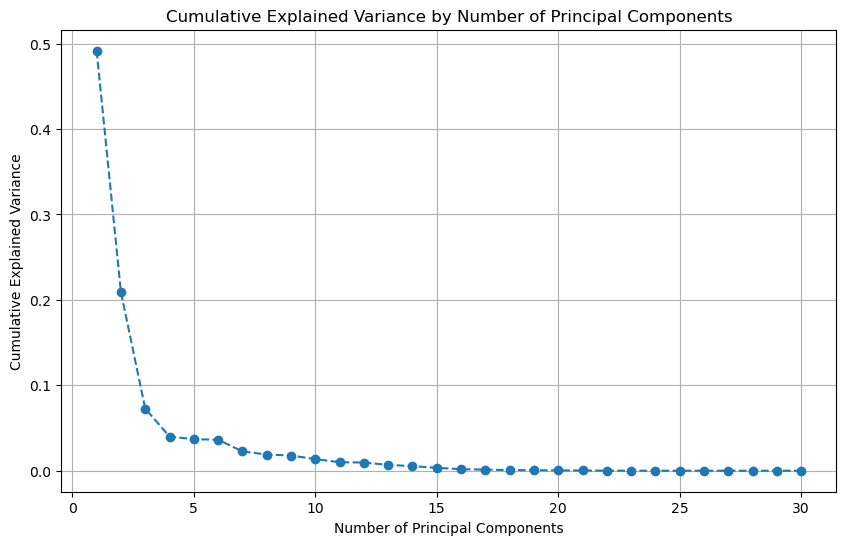

Principal Component Loadings
        birth_rate  fertility_rate           gdp  pschool_enrollment  \
PC1  -6.395623e-02   -6.240104e-02  1.659642e-01        8.283189e-03   
PC2   3.621607e-01    3.499220e-01 -5.378864e-02        6.139937e-03   
PC3   5.240481e-02    7.939790e-02  3.668471e-01        5.628939e-02   
PC4   7.783065e-02    1.298745e-01  3.007634e-01       -4.446875e-01   
PC5  -4.083160e-02   -1.097140e-01  3.304599e-02        4.275862e-01   
PC6  -6.573462e-02   -3.938204e-02 -5.628616e-02       -6.350789e-01   
PC7  -1.185820e-01   -1.714760e-01  2.848829e-01        1.445524e-01   
PC8   4.193892e-02    4.370081e-02  1.699526e-01       -3.131275e-01   
PC9  -2.058602e-02    4.391305e-02  1.164780e-01        2.526039e-01   
PC10 -1.790531e-02   -4.626223e-02  9.267536e-02        7.177921e-02   
PC11  1.060293e-01    8.404202e-02  4.138218e-01        8.621284e-02   
PC12 -5.161378e-01   -5.691024e-01  4.965167e-03       -1.200031e-01   
PC13 -3.638185e-02   -3.445154e-02 

In [7]:
numerical_columns_emigration = ['birth_rate', 'fertility_rate', 'gdp', 'pschool_enrollment', 'tschool_enrollment', 'infant_mortality', 
                                    'life_expectancy', 'maternal_mortality_ratio', 'minimum_wage', 'oop_healthcare', 'physicians_per1000', 
                                    'population', 'unemployment', 'Emigrants_males', 'Emigrants_females', 'Emigrants_males_HS', 'Emigrants_females_HS',
                                    'Emigrants_HS_total', 'Labor_males_HS', 'Labor_females_HS', 'Labor_HS', 'Labor', 'Labor_LS', 'Labor_females_LS',
                                    'Labor_males_LS', 'popf014', 'popm014', 'Emigrants_014_female', 'Emigrants_014_male', 'Emigrants_total']

# filter numerical columns
numerical_data_emigration = emigration_df[numerical_columns_emigration]
numerical_data_emigration.dropna(inplace=True)

# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data_emigration)

# apply pca
pca = PCA()
pca_transformed = pca.fit_transform(scaled_data)

# explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# print principal component loadings
loadings = pd.DataFrame(
    pca.components_,
    columns=numerical_columns_emigration,
    index=[f'PC{i+1}' for i in range(len(numerical_columns_emigration))]
)

print("Principal Component Loadings")
print(loadings)


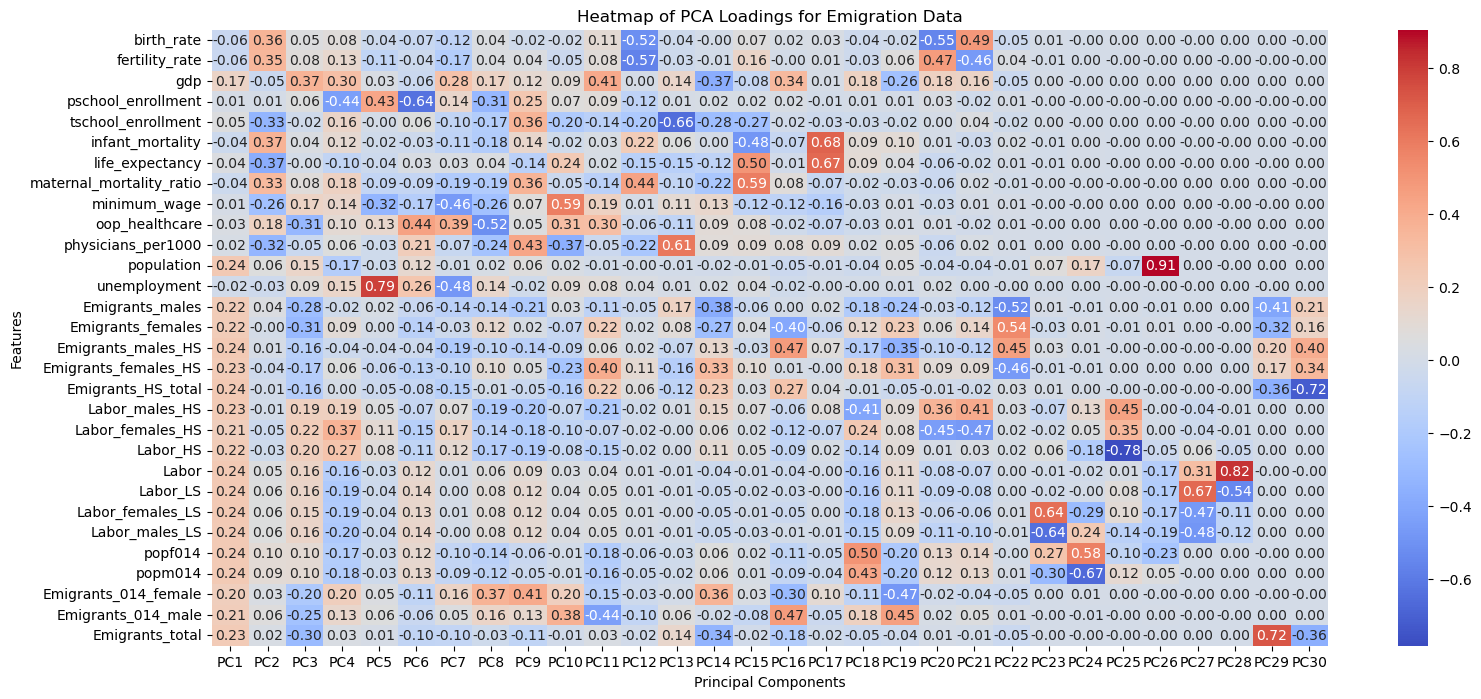

In [8]:
plt.figure(figsize=(18, 8))
sns.heatmap(loadings.T, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap of PCA Loadings for Emigration Data')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()
